# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(X,y, test_size = 0.3)

# 4. Simple Linear Model

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain) 

LinearRegression()

In [7]:
lr.score(xtrain,ytrain)

0.7370878972029007

In [8]:
lr.score(xtest,ytest)

0.7315773827672514

# 5. Ridge Regularization for Linear Model

In [9]:
#
from sklearn.linear_model import Ridge
modelr = Ridge(alpha=100)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain,ytrain)

0.7185872315011912

In [10]:
modelr.score(xtest,ytest)

0.6797414883928179

# 6. Lasso Regularization for Linear Model

In [11]:
from sklearn.linear_model import Lasso
modelr = Lasso(alpha=100)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain,ytrain)

0.19780532231908332

In [12]:
modelr.score(xtest,ytest)

0.2684731679872503

# 7. Polynomial Regression of degree 2

In [13]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
xtrain_poly = pf.fit_transform(xtrain)
xtest_poly = pf.fit_transform(xtest)


In [14]:
lrp = LinearRegression()
lrp.fit(xtrain_poly,ytrain)
lrp.score(xtrain_poly,ytrain)

0.9369725042285505

In [15]:
lrp.score(xtest_poly,ytest)

0.6996710291784038

# 8. Ridge Regularization for Polynomial model

In [16]:
modelrp = Ridge(alpha=1000000000)
modelrp.fit(xtrain_poly,ytrain)
modelrp.score(xtrain_poly,ytrain)

0.6232400504591051

In [17]:
modelrp.score(xtest_poly,ytest)

0.5535910369501249

# 9. Lasso Regularization for Polynomial model

In [18]:
modelrp = Lasso(alpha=100)
modelrp.fit(xtrain_poly,ytrain)
modelrp.score(xtrain_poly,ytrain)

0.7720164731213343

In [19]:
modelrp.score(xtest_poly,ytest)

0.7368158131266502

# 10. Select K Best

In [20]:
from sklearn.feature_selection import SelectKBest
from  sklearn.feature_selection import f_regression
kb = SelectKBest(score_func=f_regression,k=7)
x_selected= kb.fit_transform(xtrain,ytrain)
#x_selected.shape
x_selected[0]

array([  0.   ,   9.69 ,   0.585,   6.019, 391.   ,  19.2  ,  12.92 ])

In [21]:
lrk = LinearRegression()
lrk.fit(x_selected,ytrain)

LinearRegression()

In [22]:
lrk.score(x_selected,ytrain)

0.6756237217035329

In [23]:
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(xtrain)
x_train_poly = pf.fit_transform(xtest)


In [24]:
#model = LinearRegression()
#model.fit(x_train_poly, ytrain)
#model.score(x_train_poly, ytrain)

In [25]:
x_selected = kb.fit_transform(xtrain, ytrain)
x_selected[1]

array([ 17.5   ,   1.38  ,   0.4161,   7.104 , 216.    ,  18.6   ,
         8.05  ])

In [26]:
lrk.fit(xtrain,ytrain)
lrk.score(xtrain,ytrain)

0.7370878972029007

In [27]:
tdf = pd.DataFrame(xtest, columns=boston.feature_names)
tdf

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE      DIS   RAD    TAX  \
0     0.09378  12.5   7.87   0.0  0.524  5.889   39.0   5.4509   5.0  311.0   
1     0.13642   0.0  10.59   0.0  0.489  5.891   22.3   3.9454   4.0  277.0   
2     0.04301  80.0   1.91   0.0  0.413  5.663   21.9  10.5857   4.0  334.0   
3     0.61154  20.0   3.97   0.0  0.647  8.704   86.9   1.8010   5.0  264.0   
4     0.01096  55.0   2.25   0.0  0.389  6.453   31.9   7.3073   1.0  300.0   
..        ...   ...    ...   ...    ...    ...    ...      ...   ...    ...   
147   0.06588   0.0   2.46   0.0  0.488  7.765   83.3   2.7410   3.0  193.0   
148   0.16902   0.0  25.65   0.0  0.581  5.986   88.4   1.9929   2.0  188.0   
149  13.52220   0.0  18.10   0.0  0.631  3.863  100.0   1.5106  24.0  666.0   
150   0.13058   0.0  10.01   0.0  0.547  5.872   73.1   2.4775   6.0  432.0   
151   0.02498   0.0   1.89   0.0  0.518  6.540   59.7   6.2669   1.0  422.0   

     PTRATIO       B  LSTAT  
0       15.2  390.50  15.71  
1       18.6  396.90  10.87  
2       22.0  382.80   8.05  
3       13.0  389.70   5.12  
4       15.3  394.72   8.23  
..       ...     ...    ...  
147     17.8  395.56   7.56  
148     19.1  385.02  14.81  
149     20.2  131.42  13.33  
150     17.8  338.63  15.37  
151     15.9  389.96   8.65  

[152 rows x 13 columns]

In [28]:
columns = ['LSTAT','ZN','INDUS','RM','TAX','PTRATIO']

In [29]:
traindf = pd.DataFrame(data=xtrain,columns=boston.feature_names)
traindf['target'] = ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
0   0.23912   0.0   9.69   0.0  0.5850  6.019  65.3  2.4091   6.0  391.0   
1   0.01951  17.5   1.38   0.0  0.4161  7.104  59.5  9.2229   3.0  216.0   
2   0.38735   0.0  25.65   0.0  0.5810  5.613  95.6  1.7572   2.0  188.0   
3   4.87141   0.0  18.10   0.0  0.6140  6.484  93.6  2.3053  24.0  666.0   
4  14.33370   0.0  18.10   0.0  0.6140  6.229  88.0  1.9512  24.0  666.0   

   PTRATIO       B  LSTAT  target  
0     19.2  396.90  12.92    21.2  
1     18.6  393.24   8.05    33.0  
2     19.1  359.29  27.26    15.7  
3     20.2  396.21  18.68    16.7  
4     20.2  383.32  13.11    21.4

In [30]:
testdf = pd.DataFrame(data=xtest,columns=boston.feature_names)
testdf['target'] = ytest
testdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS  RAD    TAX  \
0  0.09378  12.5   7.87   0.0  0.524  5.889  39.0   5.4509  5.0  311.0   
1  0.13642   0.0  10.59   0.0  0.489  5.891  22.3   3.9454  4.0  277.0   
2  0.04301  80.0   1.91   0.0  0.413  5.663  21.9  10.5857  4.0  334.0   
3  0.61154  20.0   3.97   0.0  0.647  8.704  86.9   1.8010  5.0  264.0   
4  0.01096  55.0   2.25   0.0  0.389  6.453  31.9   7.3073  1.0  300.0   

   PTRATIO       B  LSTAT  target  
0     15.2  390.50  15.71    21.7  
1     18.6  396.90  10.87    22.6  
2     22.0  382.80   8.05    18.2  
3     13.0  389.70   5.12    50.0  
4     15.3  394.72   8.23    22.0

In [31]:
correlation = testdf.corr()
correlation

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.192604  0.433443 -0.111305  0.417994 -0.303093  0.373903   
ZN      -0.192604  1.000000 -0.503592 -0.079063 -0.505277  0.233014 -0.606684   
INDUS    0.433443 -0.503592  1.000000  0.072197  0.795634 -0.347009  0.661440   
CHAS    -0.111305 -0.079063  0.072197  1.000000  0.075172  0.060923  0.091690   
NOX      0.417994 -0.505277  0.795634  0.075172  1.000000 -0.248274  0.702086   
RM      -0.303093  0.233014 -0.347009  0.060923 -0.248274  1.000000 -0.224618   
AGE      0.373903 -0.606684  0.661440  0.091690  0.702086 -0.224618  1.000000   
DIS     -0.374447  0.687065 -0.723208 -0.098479 -0.743663  0.170368 -0.722227   
RAD      0.671626 -0.292405  0.602335 -0.162963  0.561735 -0.273021  0.451506   
TAX      0.630736 -0.271585  0.731065 -0.166960  0.648073 -0.321230  0.518929   
PTRATIO  0.314548 -0.265281  0.308856 -0.246054  0.110610 -0.390857  0.223251   
B       -0.548577  0.179149 -0.418334  0.035597 -0.440862  0.188657 -0.326043   
LSTAT    0.547465 -0.395015  0.599400 -0.011925  0.534972 -0.628210  0.619790   
target  -0.424681  0.288797 -0.468135  0.168646 -0.441050  0.719697 -0.403557   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
CRIM    -0.374447  0.671626  0.630736  0.314548 -0.548577  0.547465 -0.424681  
ZN       0.687065 -0.292405 -0.271585 -0.265281  0.179149 -0.395015  0.288797  
INDUS   -0.723208  0.602335  0.731065  0.308856 -0.418334  0.599400 -0.468135  
CHAS    -0.098479 -0.162963 -0.166960 -0.246054  0.035597 -0.011925  0.168646  
NOX     -0.743663  0.561735  0.648073  0.110610 -0.440862  0.534972 -0.441050  
RM       0.170368 -0.273021 -0.321230 -0.390857  0.188657 -0.628210  0.719697  
AGE     -0.722227  0.451506  0.518929  0.223251 -0.326043  0.619790 -0.403557  
DIS      1.000000 -0.465593 -0.510765 -0.164802  0.326942 -0.471195  0.217350  
RAD     -0.465593  1.000000  0.918960  0.468702 -0.509748  0.592690 -0.493665  
TAX     -0.510765  0.918960  1.000000  0.436672 -0.516544  0.637310 -0.557416  
PTRATIO -0.164802  0.468702  0.436672  1.000000 -0.165463  0.432324 -0.566117  
B        0.326942 -0.509748 -0.516544 -0.165463  1.000000 -0.410713  0.352120  
LSTAT   -0.471195  0.592690  0.637310  0.432324 -0.410713  1.000000 -0.727218  
target   0.217350 -0.493665 -0.557416 -0.566117  0.352120 -0.727218  1.000000

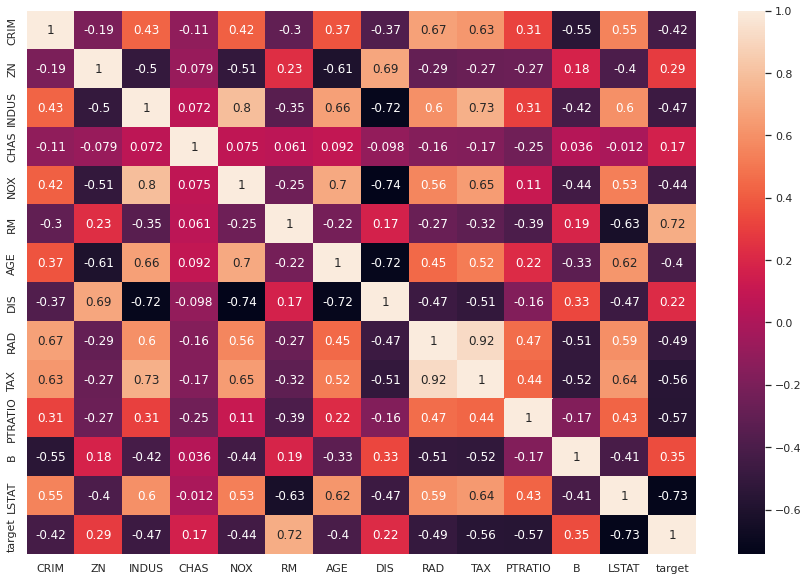

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = correlation, annot=True)
plt.show()

In [33]:
selected_columns = ['CRIM','INDUS','NOX','RM','TAX','PTRATIO','LSTAT']

In [34]:
train_selected = traindf[selected_columns]
test_selected = testdf[selected_columns]
test_selected.head()

CRIM  INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0  0.09378   7.87  0.524  5.889  311.0     15.2  15.71
1  0.13642  10.59  0.489  5.891  277.0     18.6  10.87
2  0.04301   1.91  0.413  5.663  334.0     22.0   8.05
3  0.61154   3.97  0.647  8.704  264.0     13.0   5.12
4  0.01096   2.25  0.389  6.453  300.0     15.3   8.23

In [35]:
kmodel = LinearRegression()
kmodel.fit(train_selected,ytrain)
kmodel.score(train_selected,ytrain)

0.6804643207425387

In [36]:
kmodel.score(test_selected,ytest)

0.6660836917754582

# 11. Conclusion



*   Regularization is used inorder to solve the problem of overfitting underfitting by adding more information on it.
*  If we apply a linear model on a linear dataset, then it provides us a good result but if we apply the same model with any modification on a non-linear dataset, then it will produce a drastic output. Due to which loss function will increase the error rate will be high, and accuracy will be decreased. So for such cases, we used the polynomial regression model.

